In [311]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

import regress_with_conf_interval as re

In [312]:
filename = r'./data/goodness-of-fit/sample_data/elapseTime.csv' 
df = pd.read_csv(filename)
type(df)

pandas.core.frame.DataFrame

In [313]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    #print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)

In [314]:
# Check conversion
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

55
787             23.73937261
788             8.373368801
789             5.554989641
790             7.730979801
791            17.895327345
792             6.091539417
793            11.767046307
794            24.917264045
795            14.994466842
796             6.365823771
797            48.991932445
798            77.661791433
799            13.328069717
800            12.350727025
801             3.857042071
802             4.501500361
803             1.270844402
804             8.805225931
805             2.787319244
806            10.043437127
807            21.813249853
808             8.760665249
809            19.973070954
810            13.925812901
811             14.32737461
812            20.658727685
813            25.844514891
814             2.558910078
815             32.65991003
816             5.664306161
817             5.308481564
818            13.781103671
819            45.955889973
820            21.756120251
821            13.791200179
822              

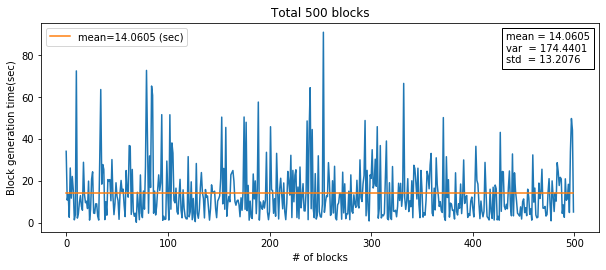

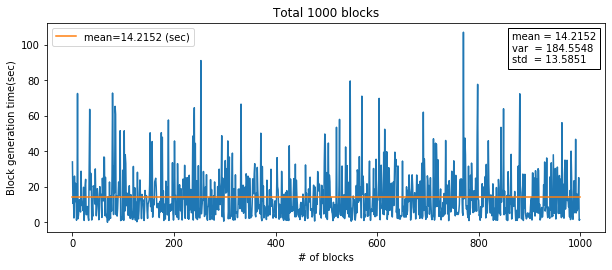

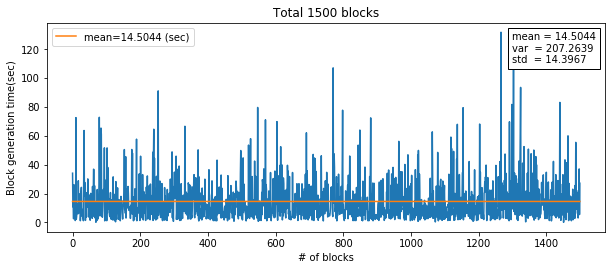

In [317]:
# Plot data
plt.rcParams["figure.figsize"] = (10,50)
difficulty = [0,0,0,0,3,3,3,3]
threads = [45,60,75,90,45,60,75,90]
mean_list = []
for i in range(len(df)//500):
    x = df['block_height'][:(i+1)*500]
    frame = df['elapsed_time'][:(i+1)*500].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    
    mean = pd.Series(frame.mean(), index=list(x))
    

    ax.set_title(f"Total {(i+1)*500} blocks")
    ax.set_xlabel("# of blocks")
    ax.set_ylabel("Block generation time(sec)")
    ax.plot(frame)
    ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    
    textstr = '\n'.join((
        r'mean = %.4f' % (frame.mean()),
        r'var  = %.4f' % (frame.var()),
        r'std  = %.4f' % (frame.std()))
    )
    mean_list.append(frame.mean().astype(float))
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="upper left")

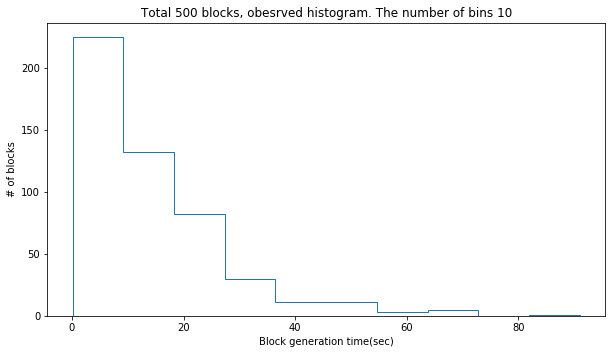

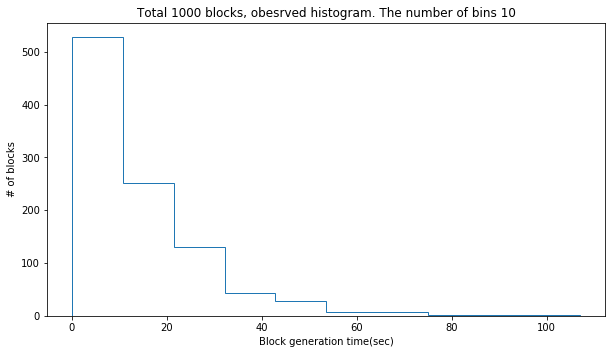

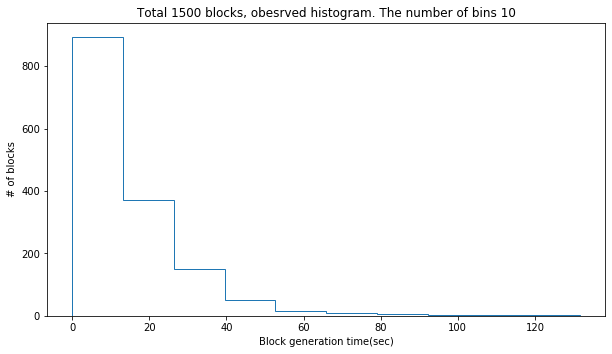

In [356]:
plt.rcParams["figure.figsize"] = (10,70)
num_of_bin = 10
histogram_val_list = []
histogram_bin_list = []
for i in range(len(df)//500):
    x = df['block_height'][:(i+1)*500]
    frame = df['elapsed_time'][:(i+1)*500].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Total {(i+1)*500} blocks, obesrved histogram. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    val, bins, patches = plt.hist(frame, bins=num_of_bin * (0 + 1), histtype='step')    
    
    histogram_val_list.append(val)
    histogram_bin_list.append(bins)
    #plt.legend(loc="upper left")

In [357]:
patches[0]

In [358]:
histogram_bin_list[0]

array([ 0.10795674,  9.19941734, 18.29087794, 27.38233854, 36.47379915,
       45.56525975, 54.65672035, 63.74818095, 72.83964155, 81.93110215,
       91.02256275])

In [359]:
histogram_val_list[0]

array([225., 132.,  82.,  30.,  11.,  11.,   3.,   5.,   0.,   1.])

In [360]:
a = histogram_bin_list[0][1:]
b = histogram_bin_list[0][:-1]
c = a - b
print(c)
print(sum(c))
print(max(histogram_bin_list[0]))

[9.0914606 9.0914606 9.0914606 9.0914606 9.0914606 9.0914606 9.0914606
 9.0914606 9.0914606 9.0914606]
90.914606014
91.022562754


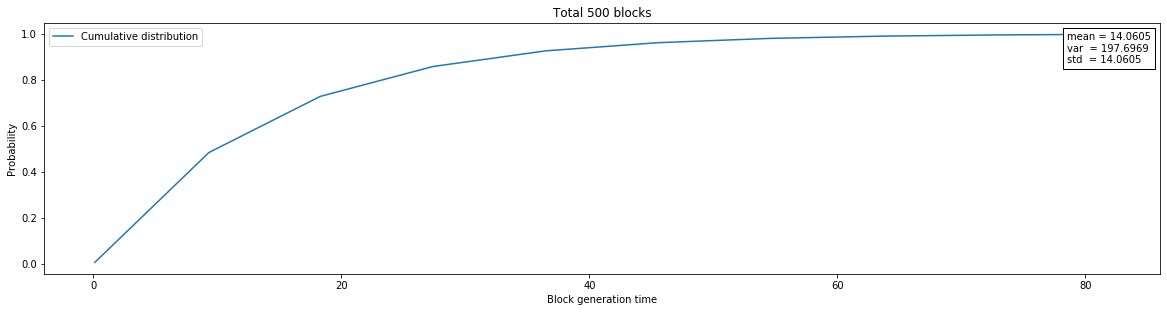

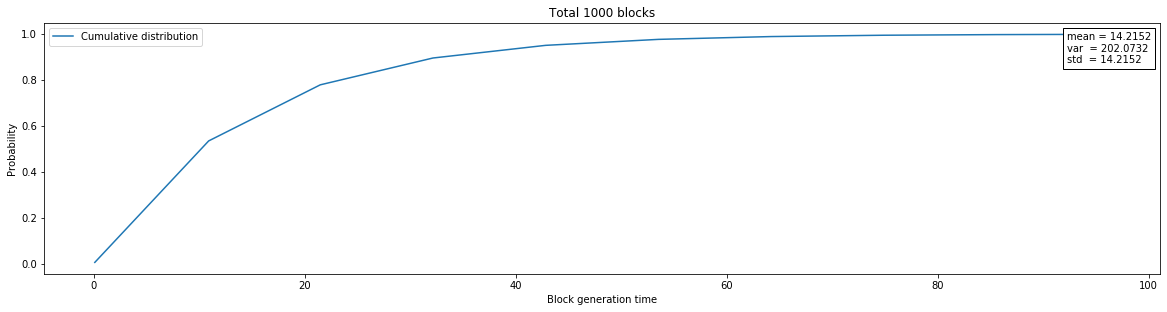

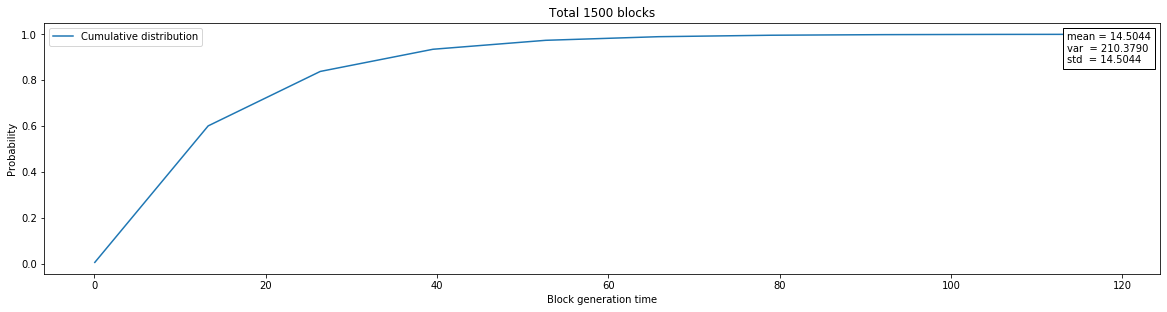

In [361]:
# Plot data
plt.rcParams["figure.figsize"] = (20,60)
cumulative_exp_distr_list = []
for i in range(len(df)//500):  
    # Merge first val and bin
    # Because first bin has different interval
    histogram_val_list = []
    histogram_bin_list[i][1] = histogram_bin_list[i][0] + histogram_bin_list[i][1]


    exp_part = np.exp(-(1/mean_list[i]) * np.array(histogram_bin_list[i][:-1]))  
    exp_distr = 1/mean_list[i] * exp_part

    cumulative_exp_distr = 1 - exp_part
    cumulative_exp_distr_list.append(cumulative_exp_distr)
    #exp_distr_frequency = (500 * (i + 1)) * exp_distr

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    ax.set_title(f"Total {(i+1)*500} blocks")
    ax.set_xlabel("Block generation time")
    #ax.set_ylabel("# of blocks")
    ax.set_ylabel("Probability")

    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #print(len(histogram_bin_list[i][:-1]))
    #print(len(exp_distr_histogram))
    
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Exp distribution")
    ax.plot(histogram_bin_list[i][:-1], cumulative_exp_distr, label=f"Cumulative distribution")

    #plt.hist(exp_distr_histogram, bins=num_of_bin, histtype='step')    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="top left")

In [362]:
cumulative_exp_distr_list[0]
a = np.array(cumulative_exp_distr_list[0][1:])
b = np.array(cumulative_exp_distr_list[0][:-1])
a[-1] = 1
c = a - b
c = np.append(cumulative_exp_distr_list[0][0], c)
print(c)
print(sum(c) == 1)

[0.00764863 0.47650852 0.24354864 0.12965962 0.06791899 0.03557768
 0.01863649 0.00976227 0.00511372 0.00562545]
True


In [363]:
cumulative_exp_distr_list[2]

array([0.00514236, 0.60039421, 0.83782619, 0.93452273, 0.97356371,
       0.98932641, 0.99569057, 0.99826008, 0.99929751, 0.99971637])

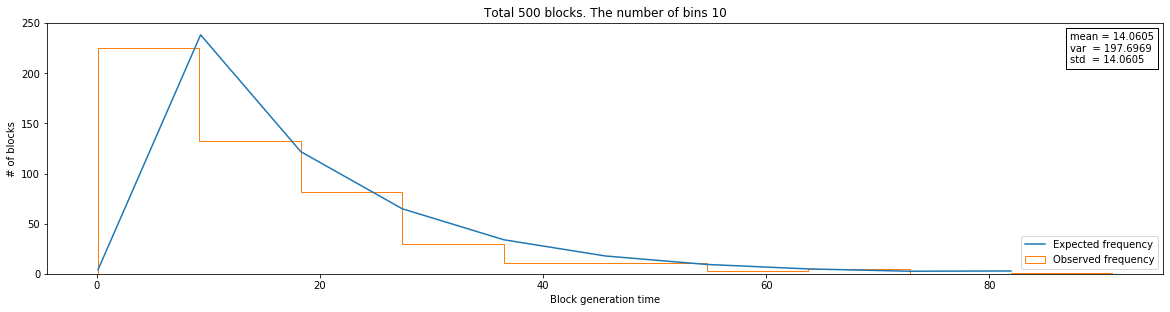

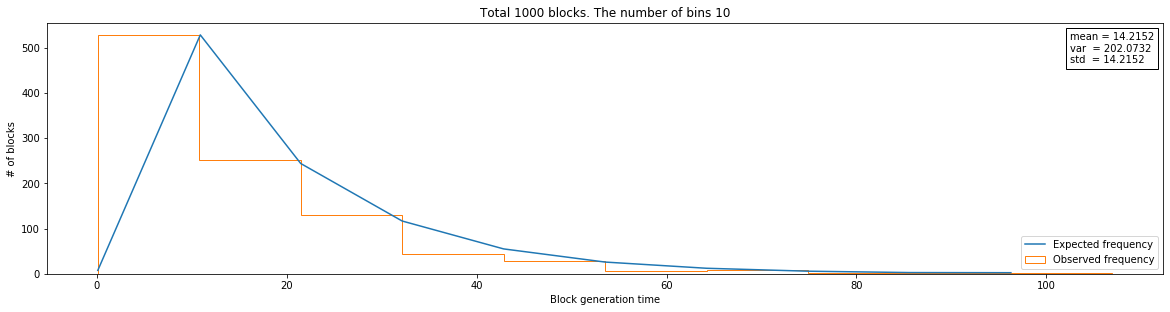

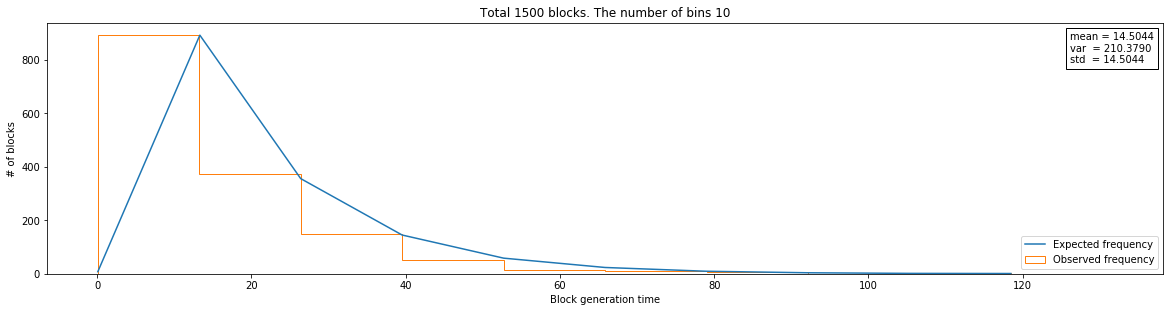

In [364]:
plt.rcParams["figure.figsize"] = (20,60)
expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
for i in range(len(df)//500):    
    frame = df['elapsed_time'][:(i+1)*500].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    right_shifted = np.array(cumulative_exp_distr_list[i][:-1])
    left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    interval = np.append(right_shifted[0], interval)

    assert sum(interval) == 1
    expected_freq = (i + 1) * 500 * interval
    interval_val_list.append(expected_freq)

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    ax.set_title(f"Total {(i+1)*500} blocks. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    ax.plot(histogram_bin_list[i][:-1], expected_freq, label=f"Expected frequency")
    ax.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', label=f"Observed frequency")    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="lower right")

In [258]:
print(sum(histogram_val_list[2][:10]))
print(sum(interval_val_list[2][:10]))

894.0
840.2929937465562


In [257]:
print(histogram_val_list[2])
print(interval_val_list[2])

[ 64. 126. 133. 133. 107.  84.  69.  69.  60.  49.  51.  57.  36.  38.
  35.  44.  34.  26.  28.  23.  26.  24.  14.  13.  16.  21.  15.   8.
   7.   5.   4.   4.   5.   7.   6.   4.   5.   5.   6.   4.   2.   0.
   2.   1.   2.   1.   2.   2.   3.   1.   1.   2.   2.   1.   1.   2.
   0.   0.   1.   0.   2.   1.   0.   1.   0.   0.   0.   0.   0.   1.
   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.]
[7.71353377e+00 1.29388985e+02 1.18170289e+02 1.07924311e+02
 9.85667127e+01 9.00204669e+01 8.22152250e+01 7.50867381e+01
 6.85763280e+01 6.26304043e+01 5.72000230e+01 5.22404840e+01
 4.77109628e+01 4.35741746e+01 3.97960674e+01 3.63455417e+01
 3.31941945e+01 3.03160855e+01 2.76875234e+01 2.52868714e+01
 2.30943683e+01 2.10919667e+01 1.92631836e+01 1.75929656e+01
 1.60675641e+01 1.46744229e+01 1.34020742e+01 1.22400448e+01
 1.11787694e+01 1.02095120e+01 9.32429430e+00 8.51582957e+00
 7.

In [134]:
chi_square_list = []
difference_list = []
for i in range(len(df)//500):
    square_of_difference = (np.array(histogram_val_list[i]) - np.array(expected_histogram_val_list[i])) ** 2
    #chi_square = square_of_difference / np.array(expected_histogram_val_list[i])
    #chi_square_list.append(chi_square)
    difference_list.append(np.mean(square_of_difference))

In [135]:
difference_list

[56.904, 65.988, 87.116]